<a href="https://colab.research.google.com/github/MrLuciferM/into_to_ml_with_python/blob/master/basic_knn_iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# imported and loaded an existing dataset from sklearn library
from sklearn.datasets import load_iris
iris = load_iris()

In [2]:
type(iris)

sklearn.utils.Bunch

In [3]:
iris.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [4]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [5]:
iris.filename

'/usr/local/lib/python3.6/dist-packages/sklearn/datasets/data/iris.csv'

In [6]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [7]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [8]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [9]:
iris.data[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [10]:
iris.data.shape

(150, 4)

In [11]:
# split the data into default 75-25 training and test sets using train_test_split
from sklearn.model_selection import train_test_split

X = iris.data
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

In [12]:
print('X_train: {} X_test: {}'.format(X_train.shape, X_test.shape))
print('y_train: {} y_test: {}'.format(y_train.shape, y_test.shape))

X_train: (112, 4) X_test: (38, 4)
y_train: (112,) y_test: (38,)


In [13]:
import matplotlib.pyplot as plt

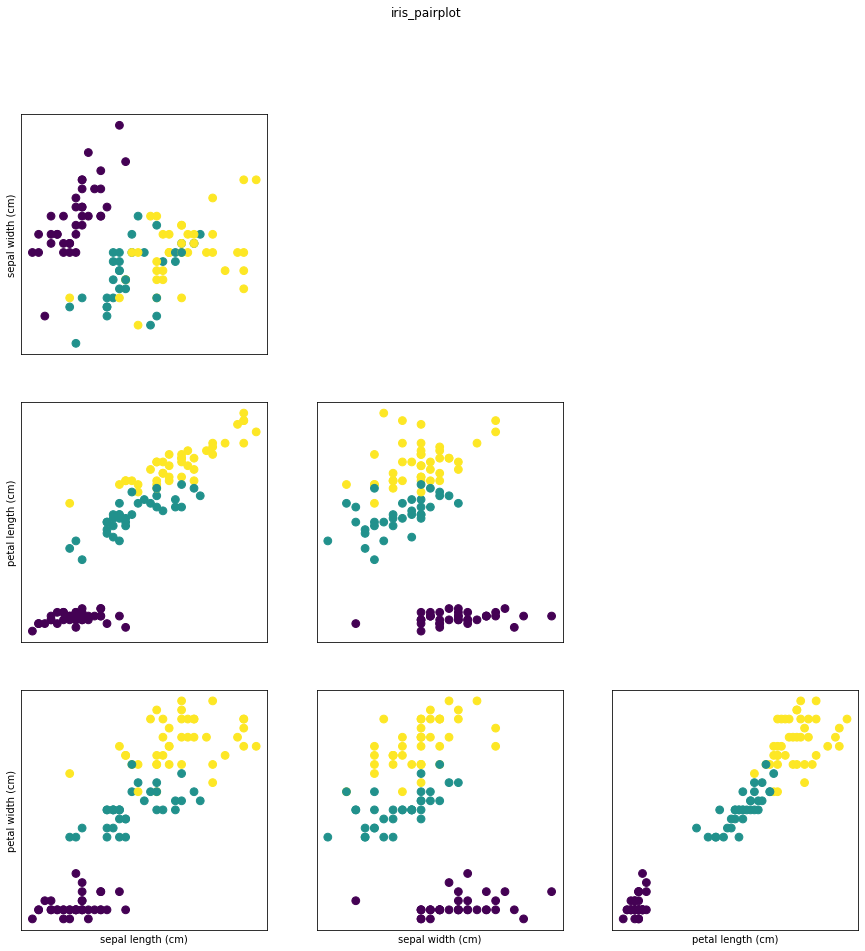

In [14]:
# plotted the scatter plots/ pair plots for different features

fig, ax = plt.subplots(3, 3, figsize= (15,15))
plt.suptitle('iris_pairplot')

for i in range(3):
  for j in range(3):
    ax[i, j].scatter(X_train[:, j], X_train[:, i+1], c=y_train, s=60)
    ax[i, j].set_xticks(())
    ax[i, j].set_yticks(())
    if i == 2:
      ax[i, j].set_xlabel(iris['feature_names'][j])
    if j == 0:
      ax[i, j].set_ylabel(iris['feature_names'][i+1])
    if j > i:
      ax[i, j].set_visible(False)

In [15]:
# imported and instantiated KNN classifier from sklearn with K = 1
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=1)

In [16]:
# trained the model on the training set
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [17]:
import numpy as np

# created a test value of X
X_new = np.array([[5, 2.9, 1, 0.2]])
X_new.shape

(1, 4)

In [18]:
prediction = knn.predict(X_new)
prediction

array([0])

In [19]:
iris.target_names[prediction]

array(['setosa'], dtype='<U10')

In [20]:
# accuracy of the model on test set
y_pred = knn.predict(X_test)
np.mean(y_pred == y_test)

0.9736842105263158

In [21]:
# accuracy with score method
knn.score(X_test, y_test)

0.9736842105263158